# <center>Cyclistic Bike-Sharing Analysis</center>


## Preface

<b>The Cyclistic Company<b>
    
Cyclistic is a bike-sharing company located in Chicago, United States, featuring more than 5,800 bicycles and 600 docking stations. In addition to offering traditional bikes, Cyclistic also provides reclining bikes, hand tricycles, and cargo bikes to make bike-sharing more inclusive for people with disabilities and those who cannot use a standard two-wheeled bike. Cyclistic users often ride for leisure, but they also use the bikes to commute to work.

Up until now, Cyclistic's marketing strategy has focused on building general awareness and appealing to a wide range of consumer segments. One way they have achieved this is through the flexibility of their pricing plans, which include single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders, while those who purchase annual memberships are called Cyclistic members.

Although the diverse pricing options help Cyclistic attract more customers, the company believes that increasing the number of annual members will be crucial for future growth. Instead of targeting completely new customers with a marketing campaign, Cyclistic believes there is a good chance of converting casual riders into members.

## Business Requirement

<ul>
    <li>Analyse how member rider's and casual rider's behave differently.</li>
    <li>Support stakeholders in making data-driven decisions to develop campaigns or strategies aimed at converting casual riders into Cyclistic members.</li>

</ul>

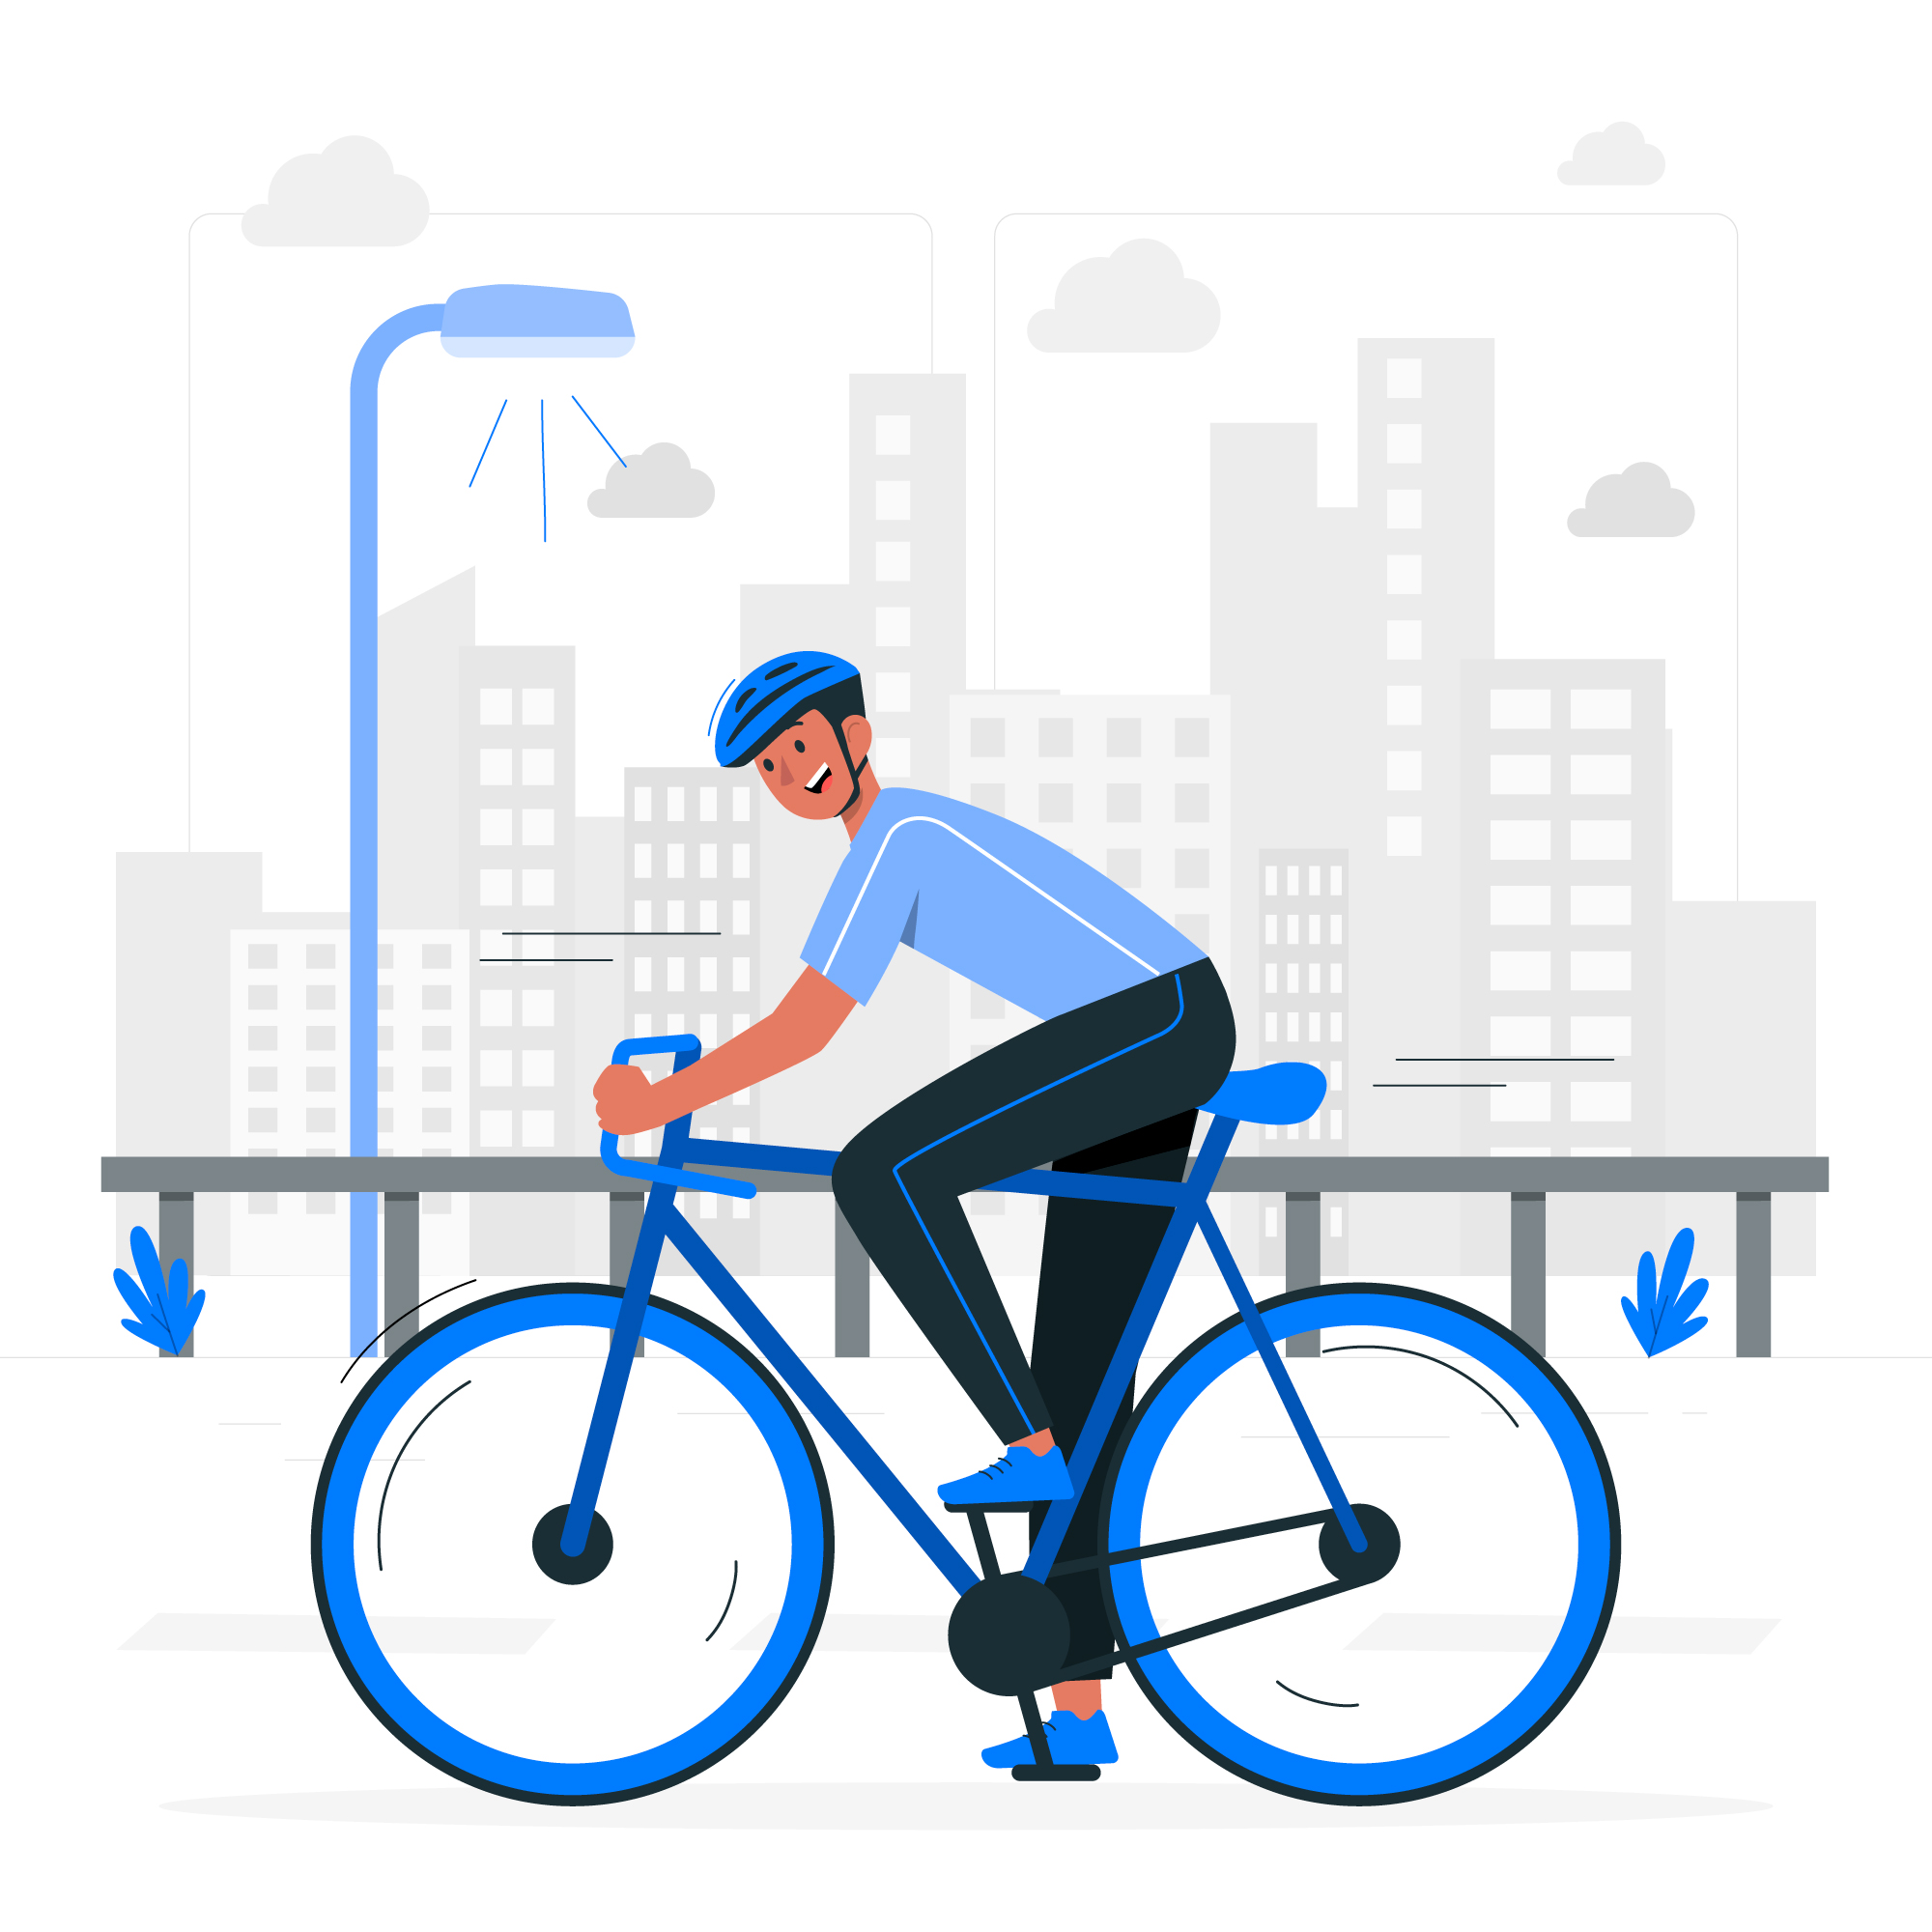

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
import datetime
import calendar
import glob
import os
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image, display
display(Image(filename='D:/Data Analysis/Cyclist_2022/Cyclistic-Bike-Sharing-Analysis-main/fig/cyclistic_cover.jpg'))


## Importing Library's

In [131]:
path ='D:/Data Analysis/Cyclist_2022/datas/2021_datas'  
all_files = glob.glob(os.path.join(path, "*.csv")) 

df_list = []
for filename in all_files:
    data = pd.read_csv(filename)
    df_list.append(data)

df = pd.concat(df_list).reset_index()
df = df.drop(['index'], axis=1)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [132]:
df.shape

(5595063, 13)

In [133]:
df.size

72735819

In [134]:
total_memory = df.memory_usage(deep=True).sum()
print(f'Total memory usage: {total_memory/1024**2} MB')

Total memory usage: 3525.7090549468994 MB


In [135]:
print(f"Number of rows:{df.shape[0]}")

Number of rows:5595063


In [136]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_lat,5595063.0,41.901071,0.046086,41.64,41.881555,41.898969,41.929143,42.070000
start_lng,5595063.0,-87.646046,0.028721,-87.84,-87.660000,-87.641823,-87.627734,-87.520000
end_lat,5590292.0,41.901341,0.046189,41.39,41.881840,41.899643,41.929199,42.168116
end_lng,5590292.0,-87.646258,0.028900,-88.97,-87.660000,-87.642746,-87.627754,-87.490000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB


# Checking for Missing Values

In [138]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

In [139]:
percent_null=df.isnull().sum()/len(df)
print(round(percent_null,2))

ride_id               0.00
rideable_type         0.00
started_at            0.00
ended_at              0.00
start_station_name    0.12
start_station_id      0.12
end_station_name      0.13
end_station_id        0.13
start_lat             0.00
start_lng             0.00
end_lat               0.00
end_lng               0.00
member_casual         0.00
dtype: float64


The column's of start_station_name, start_station_id, end_station_name, and end_station_id have quite many missing values, which is over 12-13%. There are also some missing values in end_lat and end_lng, though it is much smaller or less than 0.1%.

# Handling Missing Values

In [140]:
df=df.drop(['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'],axis=1)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,41.900326,-87.696697,41.90,-87.70,casual


In [141]:
# Filling the Missing values
df['start_lat'].fillna(df['start_lat'].mode()[0],inplace=True)
df['end_lat'].fillna(df['end_lat'].mode()[0],inplace=True)

In [142]:
df.isna().sum()

ride_id             0
rideable_type       0
started_at          0
ended_at            0
start_lat           0
start_lng           0
end_lat             0
end_lng          4771
member_casual       0
dtype: int64

In [143]:
df.duplicated().value_counts()

False    5595063
dtype: int64

There seems to be no duplicated values in our set.

# Statistical Summary

Since the only numerical label in our dataset is location coordinate which can't be summarized in statistical value, we will only view the statistical summary of categorical labels.

In [144]:
# separate the object column
cat_col=[]

for col in df.columns:
    if df[col].dtype=='object':
        cat_col.append(col)
        
df[cat_col].describe()

,ride_id,rideable_type,started_at,ended_at,member_casual
count,5595063,5595063,5595063,5595063,5595063
unique,5595063,3,4677998,4671372,2
top,E19E6F1B8D4C42ED,classic_bike,2021-07-16 16:59:57,2021-09-16 08:39:10,member
freq,1,3251028,7,17,3066058


<ul>
  <li>The above data depicts that there are 3 rideable types and the most used is electric bike.</li>
  <li>Most of the customers are annual paid members </li>
</ul>

# Data Analysis and visualizations

Number of ride by Bike Riders

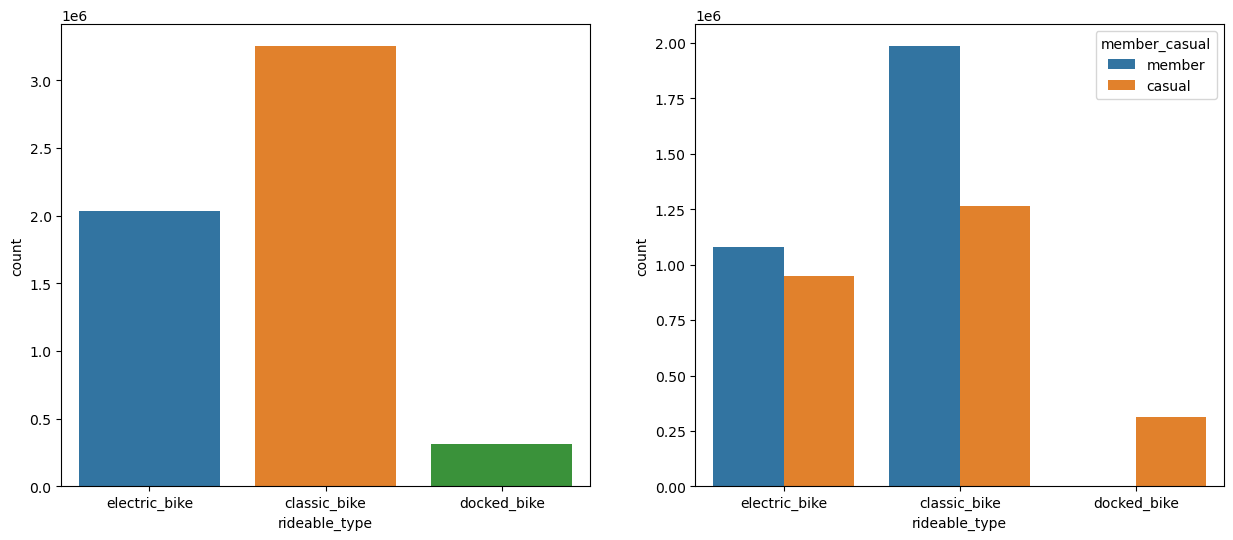

In [145]:
fig,ax=plt.subplots(1,2, figsize=(15,6))
ax[0]=sns.countplot(ax=ax[0],x='rideable_type',data=df)
ax[1]=sns.countplot(ax=ax[1],x='rideable_type',data=df,hue='member_casual')

In [146]:
bike_cnt=df.groupby('rideable_type',as_index=False)['ride_id'].count()
bike_cnt=bike_cnt.rename(columns={'ride_id':'ride_count'})
bike_cnt

,rideable_type,ride_count
0,classic_bike,3251028
1,docked_bike,312343
2,electric_bike,2031692


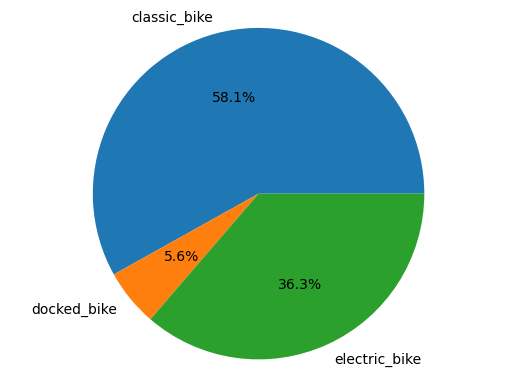

In [147]:
bike_type=['classic_bike','docked_bike','electric_bike']
ride_num=bike_cnt.ride_count

plt.pie(ride_num,labels=bike_type,autopct='%0.1f%%')
plt.axis('equal')
plt.show()

<ul>
    <li>Classic Bike is most preferred which accounts half of all the rides.</li>
    <li>Member riders use electric bike's than casual bikes,also its noted that non members use more classic bike than electric bikes which seems to be most preferred among them.</li>

</ul>

# Number of rides by membership type

In [148]:
member_cnt=df.groupby('member_casual',as_index=False)['ride_id'].count()
member_cnt=member_cnt.rename(columns={'ride_id':'ride_count'})
member_cnt

,member_casual,ride_count
0,casual,2529005
1,member,3066058


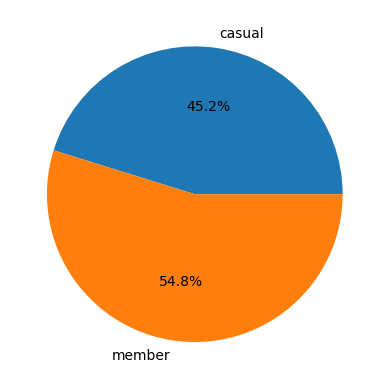

In [149]:
member_type=['casual','member']
ride_num=member_cnt.ride_count

plt.pie(ride_num,labels=member_type,autopct='%0.1f%%')
plt.show()

54% are of the member riders and rest 45% are casual riders.

# Analysis of Date-Time column's 

In [150]:
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,41.900313,-87.696643,41.90,-87.70,member


In [151]:
# convert `started_at` and `ended_at` columns to datetime data type
df['started_at'] = pd.to_datetime(df['started_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   start_lat      float64       
 5   start_lng      float64       
 6   end_lat        float64       
 7   end_lng        float64       
 8   member_casual  object        
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 384.2+ MB


In [153]:
# Creating month column
df['month']=df['started_at'].dt.month_name()

In [154]:
# creating the season column
def find_season(month):
    season_month={
            'December':'Winter', 'January':'Winter', 'February':'Winter',
            'March':'Spring', 'April':'Spring', 'May':'Spring',
            'June':'Summer', 'July':'Summer', 'August':'Summer',
            'September':'Autumn', 'October':'Autumn', 'November':'Autumn'}
    return season_month.get(month)

season_list=[]

for month in df['month']:
    season = find_season(month)
    season_list.append(season)

df['season']=season_list

In [155]:
# creating day-of-week column
df['day-of-week']=df['started_at'].dt.day_name()

In [156]:
# create hour time of the ride 
df['time_hour'] = df['started_at'].dt.hour

In [157]:
# creating hour time of the ride
df['ride_duration']=(df['ended_at']-df['started_at']).dt.total_seconds()/60

In [158]:
# creating stastical summary of ride_duration column
df['ride_duration'].describe()

count    5.595063e+06
mean     2.193534e+01
std      1.783348e+02
min     -5.803333e+01
25%      6.750000e+00
50%      1.200000e+01
75%      2.178333e+01
max      5.594415e+04
Name: ride_duration, dtype: float64

In [159]:
df[df['ride_duration']<0].count()

ride_id          147
rideable_type    147
started_at       147
ended_at         147
start_lat        147
start_lng        147
end_lat          147
end_lng          146
member_casual    147
month            147
season           147
day-of-week      147
time_hour        147
ride_duration    147
dtype: int64

The above data mentions the durtion below 0 minutes, since this refer's to inaccurate data we filter the observations accordingly.

In [160]:
df=df[df['ride_duration']>0]

In [161]:
df.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,month,season,day-of-week,time_hour,ride_duration
4863374,C9D1B2AE9B57FA9C,electric_bike,2021-10-20 13:52:52,2021-10-20 13:57:35,41.790000,-87.600000,41.790000,-87.600000,member,October,Autumn,Wednesday,13,4.716667
761934,E7037B6508D57F88,electric_bike,2021-05-28 11:52:59,2021-05-28 11:58:19,41.865024,-87.656971,41.867118,-87.641040,member,May,Spring,Friday,11,5.333333
5199870,2182733E4CE64FF5,electric_bike,2021-11-24 19:36:30,2021-11-24 19:55:40,41.877729,-87.654879,41.891209,-87.618184,casual,November,Autumn,Wednesday,19,19.166667
2326458,C22BC386895DE4C3,docked_bike,2021-07-24 21:52:53,2021-07-25 00:06:50,41.872078,-87.629544,41.872078,-87.629544,casual,July,Summer,Saturday,21,133.950000
5140207,D4B9B5ED74744F23,electric_bike,2021-11-04 07:32:22,2021-11-04 07:45:19,41.931304,-87.638704,41.897835,-87.642982,casual,November,Autumn,Thursday,7,12.950000


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5594410 entries, 0 to 5595062
Data columns (total 14 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   start_lat      float64       
 5   start_lng      float64       
 6   end_lat        float64       
 7   end_lng        float64       
 8   member_casual  object        
 9   month          object        
 10  season         object        
 11  day-of-week    object        
 12  time_hour      int64         
 13  ride_duration  float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(6)
memory usage: 640.2+ MB


# Number of rides per month

In [163]:
month_order=['January','February','March','April','May','June','July','August','September','October','November','December']

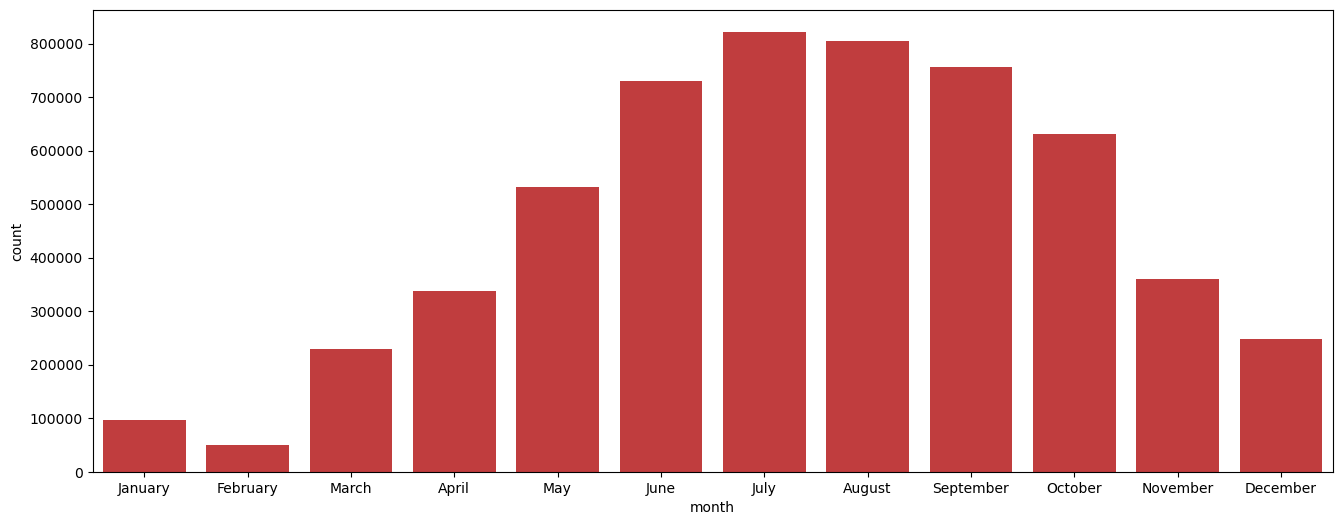

In [182]:
plt.figure(figsize=(16,6))
sns.countplot(x='month',data=df,order=month_order,color='tab:red')
plt.show()

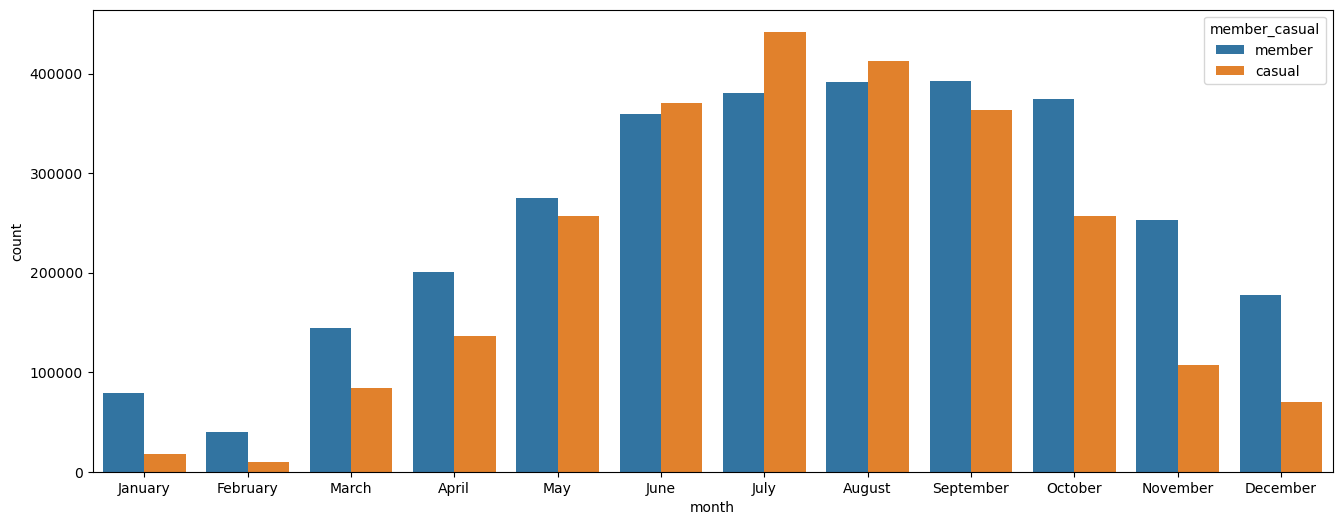

In [180]:
plt.figure(figsize=(16,6))
sns.countplot(x='month',data=df,order=month_order,hue='member_casual')
plt.show()

<ul>
    <li>The above plots depicts that the number of rides increased exponentially from March and reached its peak during the month of july.</li>
    <li>The highest rides occured during the months of June,July & August.</li>
    <li>The lowest numbers were during the months of January and February</li>
    <li>Number of casual rider's were higher than member rider's during the peak month's.The number of causal riders increased exponentially during the peak period.</li>

</ul>

# Rides per season

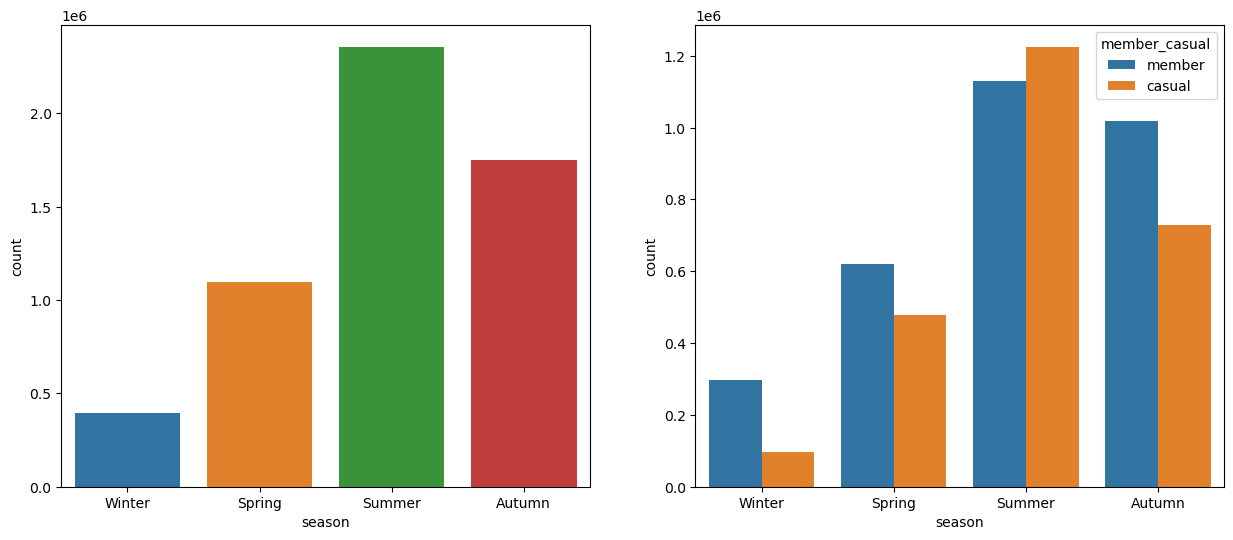

In [166]:
season_order=['Winter','Spring','Summer','Autumn']
fig,ax=plt.subplots(1,2,figsize=(15,6))
ax[0]=sns.countplot(ax=ax[0],x='season',order=season_order,data=df)
ax[1]=sns.countplot(ax=ax[1],x='season',order=season_order,data=df,hue='member_casual')
plt.show()

<ul>
    <li>Based on season, the number of rides were highest during Summer.</li>
    <li>This is most likely contributed by the high increase of casual riders during summer.</li>

</ul>

# Number of rides by day of week

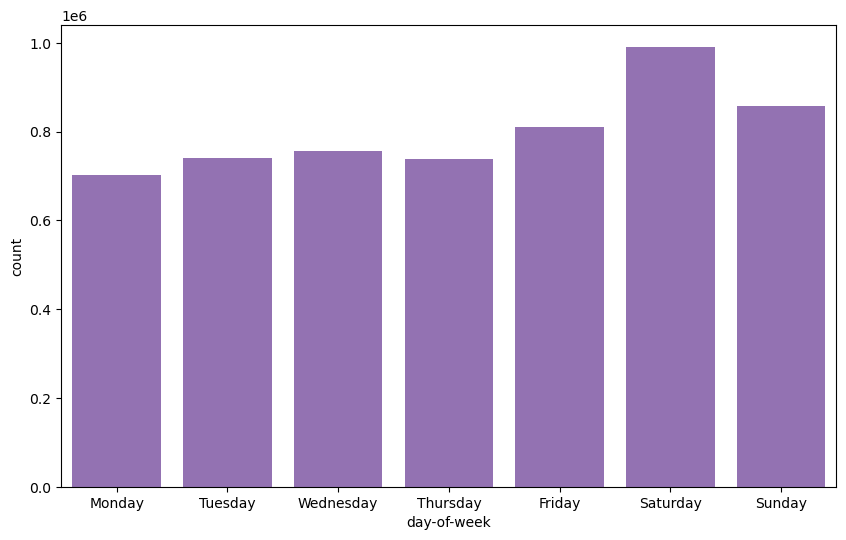

In [167]:
day_ord=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(10,6))
sns.countplot(x='day-of-week',data=df,order=day_ord,color='tab:purple')
plt.show()

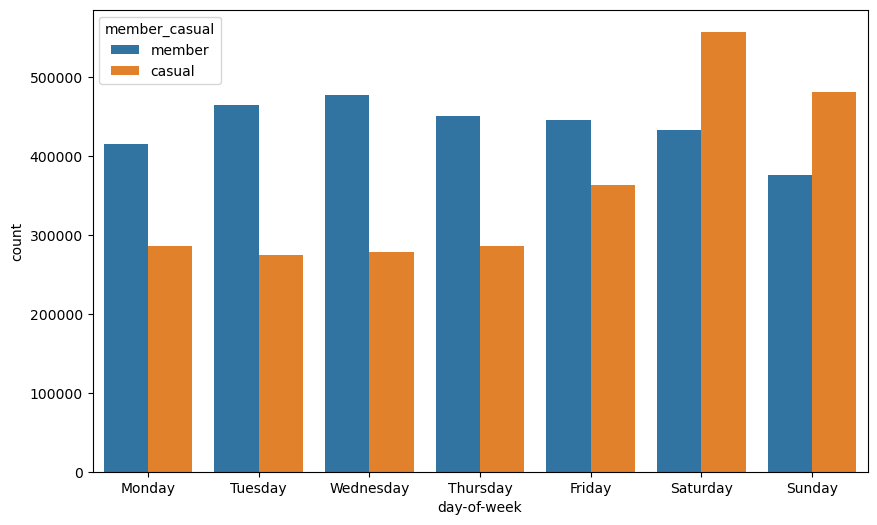

In [168]:
plt.figure(figsize=(10,6))
sns.countplot(x='day-of-week',data=df,order=day_ord,hue='member_casual')
plt.show()

<ul>
    <li>The number of rides are moderately consistent during the weekday.The number of rides increase to its peak during the weekends.</li>
    <li>The number of rides are dominated by member riders durings the weekdays, whereas during the weekend period the casual riders are among the most.</li>
    <li>The number of rides by casual riders are quite modest during weekday.However, during weekend the number of rides by casual riders increases significantly.</li>

</ul>

# Number of rides by hour of day

In [169]:
hour_ride=df.groupby(['time_hour','member_casual'],as_index=False)['ride_id'].count()
hour_ride=hour_ride.rename(columns={'ride_id':'ride_count'})
hour_ride

,time_hour,member_casual,ride_count
0,0,casual,53912
1,0,member,33134
2,1,casual,39238
3,1,member,21900
4,2,casual,25556
5,2,member,12458
6,3,casual,14073
7,3,member,7160
8,4,casual,9953
9,4,member,8143


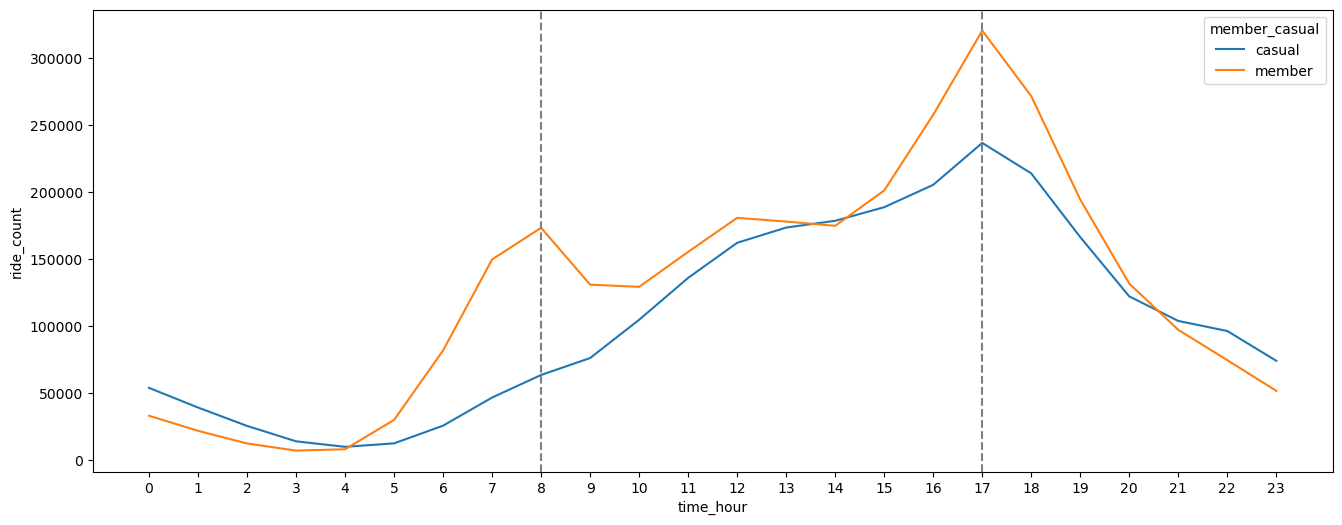

In [170]:
plt.figure(figsize=(16,6))
sns.lineplot(x='time_hour',y='ride_count',hue='member_casual',data=hour_ride)
x=np.arange(0,24,1)
plt.xticks(x)
plt.axvline(x=8,color='gray',linestyle='--')
plt.axvline(x=17,color='gray',linestyle='--')
plt.show()

<ul>
    <li>For member riders,the number of rides reach its peak during 8:00 AM and 17:00 PM.</li>
    <li>Since we know that meber riders mostly rent bike during weekday, both 8 AM and 17 PM are thus interpreted as 'Rush-Hour'. </li>
    <li>For casual riders, the number of riders seems steadily strating during 5:00 AM and reach its peak at 17:00 Pm. </li>
</ul>

# Average ride duration by Member  and Day of week

In [171]:
avg_ride_duration=df.groupby(['member_casual','day-of-week'],as_index=False)['ride_duration'].mean()
avg_ride_duration

,member_casual,day-of-week,ride_duration
0,casual,Friday,30.351768
1,casual,Monday,31.879122
2,casual,Saturday,34.709966
3,casual,Sunday,37.570956
4,casual,Thursday,27.705776
5,casual,Tuesday,27.975488
6,casual,Wednesday,27.661074
7,member,Friday,13.326080
8,member,Monday,13.248260
9,member,Saturday,15.265522


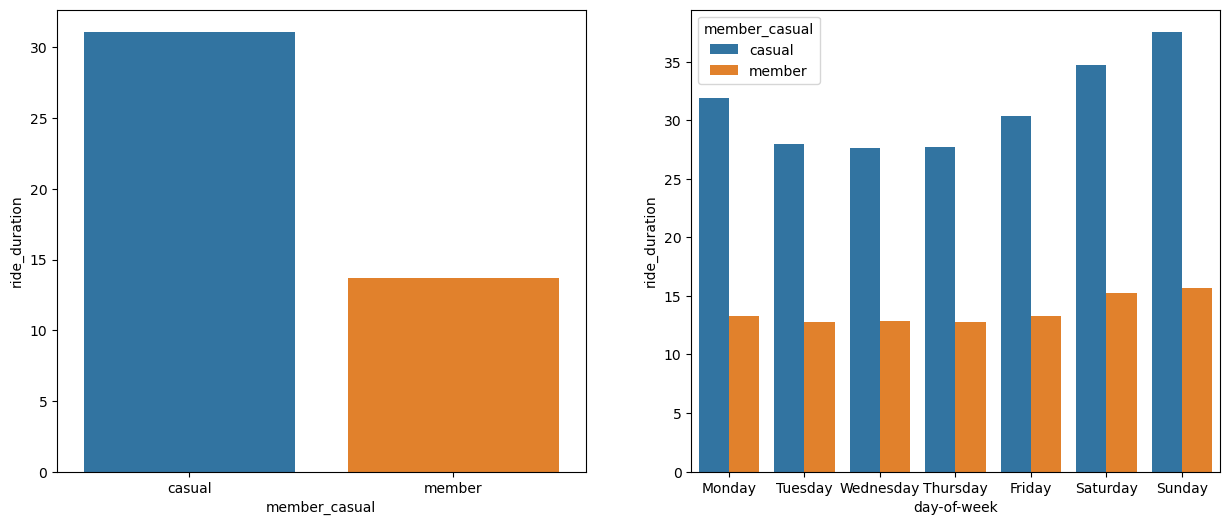

In [172]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
ax[0]=sns.barplot(ax=ax[0],x='member_casual',y='ride_duration',data=avg_ride_duration,ci=None)
ax[1]=sns.barplot(ax=ax[1],x='day-of-week',y='ride_duration',data=avg_ride_duration,ci=None,hue='member_casual',order=day_ord)
plt.show()

<ul>
   <li>Average ride duration by casual riders are higher than member riders.On average,
    casual riders spent 28 - 37 minutes everyday riding their bike.Member riders spent 
    12-14 minutes on average everyday.</li>
    <li>The ride duration of member riders are consistent on everyday of the week.</li>
    <li>The ride duration of casual riders are mostly below 30 minutes on weekday, but ride duration
    rises to 30-37 minutes on weekend.</li>

</ul>

# Findings and recommendations

Through analysinsg the data,we have discovered several interesting conclusions:

<ul>
    <li>The majority of rides are taken by casual riders.</li>
    <li>Classic bikes are the most popular among all riders, with casual riders particularly preferring them.</li>
    <li>The number of rides reaches its peak during the summer months of June, July, and August, with casual riders contributing significantly to this increase.</li>
    <li>Member riders tend to rent bikes more often on weekdays, while casual riders are more active on weekends.</li>
    <li>For member riders, "rush hour" tends to be at 8:00 in the morning and 17:00 in the afternoon. Casual riders have more evenly distributed usage throughout the morning and afternoon, with a peak at 17:00.</li>
    <li>On average, casual riders spend 28 minutes per day riding bikes, while member riders spend 12 minutes per day.</li>
    <li>The ride duration for member riders remains relatively constant throughout the week, while for casual riders it increases on weekends.</li>


</ul>

# Recommendation's

<ol>
    <li><b>Weekend Pass</b>- The Weekend Pass is targeted to casual riders who mostly rent a bike during weekend. The Weekend Pass will have lower price point than the Annual Pass, but can only be used during Friday, Saturday, and Sunday.</li>
    <br>
    <li><b>Reward point campaign</b>- Give user reward points which accumulated by riding duration. Since casual riders ride duration is higher than current member riders, they will benefit more from this campaign. Offer them membership discount when they reach certain points to convert them into Cyclistic's member</li><br>
    <li><b>Perform strategic campaign during summer</b>- Given the number of riders are at its annual peak in summer, we can do strategic campaign and advertising to reach more audience.</li><br>
    

</ol>

# Outlook

Future exploration several inshights could be collected and analyzed.

<ul>
    <li>Demographic of users ,such as rider occupation, age,gender</li>
    <li>Incude data whether the rider uses single ride pass or full day pass.</li>

</ul>